In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Evaluste Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# MLP
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

# MLP Models

In [2]:
# read dataset
dataSales = pd.read_csv('salesdaily.csv', sep=',')
dataSales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [3]:
# select components
dataM = dataSales[['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']]
dataM.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0
1,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0
2,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0
4,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0


In [4]:
# Split into train and test
index = int(len(dataM.index)*0.8)
dataM_train = dataM.iloc[:index,:]
dataM_test = dataM.iloc[index:,:]
print("Train: {} | Test: {}".format(dataM_train.shape, dataM_test.shape))

Train: (1684, 8) | Test: (422, 8)


In [5]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

## M01AB

In [6]:
# define input sequence
raw_seq = dataM_train[['M01AB']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model1 = Sequential()
mlp_model1.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model1.add(Dense(1))
mlp_model1.compile(optimizer='adam', loss='mse')
# fit model
mlp_model1.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [7]:
# Test set prediction
x_input =  dataM_test[['M01AB']].values.T[0]
X_test, y_test1 = split_sequence(x_input, n_steps)
yhat1 = mlp_model1.predict(X_test, verbose=0)
yhat1=np.where(yhat1 >= 0, yhat1, 0)
print(yhat1[:5])

[[5.407096 ]
 [5.445939 ]
 [5.3520536]
 [4.778167 ]
 [5.4236135]]


In [8]:
# Evaluste Model
RMSE_MLP1 = mean_squared_error(y_test1,yhat1, squared=False)
MAE_MLP1 = mean_absolute_error(y_test1, yhat1)

comp_MLP = np.concatenate((y_test1.reshape((len(y_test1), 1)),yhat1),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP1 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - M01AB')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP1, MAE_MLP1, MAPE_MLP1))

MLP - M01AB
RMSE: 2.8802105882336395 
MAE: 2.2469052396014084 
MAPE: 0.35380393434509794


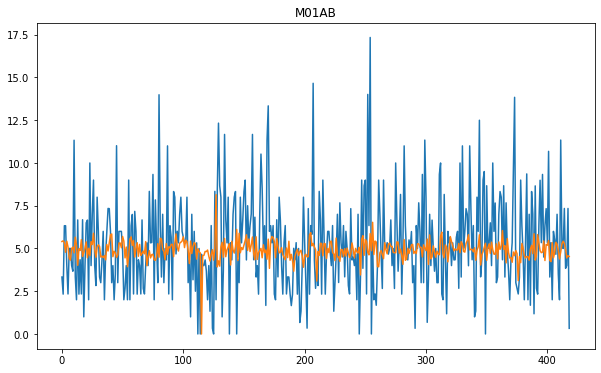

In [9]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test1)
plt.plot(yhat1)
plt.title("M01AB")
plt.show()

## M01AE

In [10]:
# define input sequence
raw_seq = dataM_train[['M01AE']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model2 = Sequential()
mlp_model2.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model2.add(Dense(1))
mlp_model2.compile(optimizer='adam', loss='mse')
# fit model
mlp_model2.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [11]:
# Test set prediction
x_input =  dataM_test[['M01AE']].values.T[0]
X_test, y_test2 = split_sequence(x_input, n_steps)
yhat2 = mlp_model2.predict(X_test, verbose=0)
yhat2=np.where(yhat2 >= 0, yhat2, 0)
print(yhat2[:5])

[[3.4024203]
 [5.04629  ]
 [4.2031693]
 [3.895843 ]
 [3.9175148]]


In [12]:
# Evaluste Model
RMSE_MLP2 = mean_squared_error(y_test2,yhat2, squared=False)
MAE_MLP2 = mean_absolute_error(y_test2, yhat2)

comp_MLP = np.concatenate((y_test2.reshape((len(y_test2), 1)),yhat2),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP2 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - M01AE')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP2, MAE_MLP2, MAPE_MLP2))

MLP - M01AE
RMSE: 2.250206015211887 
MAE: 1.7346586622998368 
MAPE: 0.8493851369219184


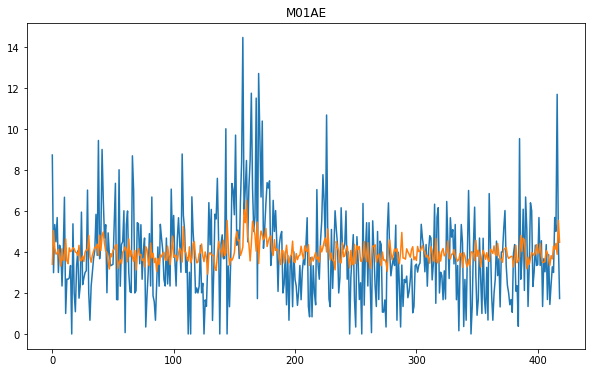

In [13]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test2)
plt.plot(yhat2)
plt.title("M01AE")
plt.show()

## N02BA

In [14]:
# define input sequence
raw_seq = dataM_train[['N02BA']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model3 = Sequential()
mlp_model3.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model3.add(Dense(1))
mlp_model3.compile(optimizer='adam', loss='mse')
# fit model
mlp_model3.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [15]:
# Test set prediction
x_input =  dataM_test[['N02BA']].values.T[0]
X_test, y_test3 = split_sequence(x_input, n_steps)
yhat3 = mlp_model3.predict(X_test, verbose=0)
yhat3=np.where(yhat3 >= 0, yhat3, 0)
print(yhat3[:5])

[[4.004841 ]
 [4.1803555]
 [3.8502674]
 [4.143324 ]
 [3.628591 ]]


In [16]:
# Evaluste Model
RMSE_MLP3 = mean_squared_error(y_test3,yhat3, squared=False)
MAE_MLP3 = mean_absolute_error(y_test3, yhat3)

comp_MLP = np.concatenate((y_test3.reshape((len(y_test3), 1)),yhat3),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP3 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - N02BA')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP3, MAE_MLP3, MAPE_MLP3))

MLP - N02BA
RMSE: 2.1729826601203603 
MAE: 1.7647324541019083 
MAPE: 1.0754790310288753


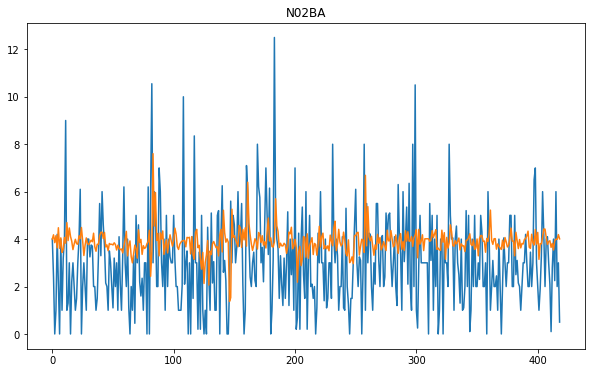

In [17]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test3)
plt.plot(yhat3)
plt.title("N02BA")
plt.show()

## N02BE

In [18]:
# define input sequence
raw_seq = dataM_train[['N02BE']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model4 = Sequential()
mlp_model4.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model4.add(Dense(1))
mlp_model4.compile(optimizer='adam', loss='mse')
# fit model
mlp_model4.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [19]:
# Test set prediction
x_input =  dataM_test[['N02BE']].values.T[0]
X_test, y_test4 = split_sequence(x_input, n_steps)
yhat4 = mlp_model4.predict(X_test, verbose=0)
yhat4=np.where(yhat4 >= 0, yhat4, 0)
print(yhat4[:5])

[[21.212185]
 [22.578133]
 [29.337248]
 [28.076933]
 [24.962654]]


In [20]:
# Evaluste Model
RMSE_MLP4 = mean_squared_error(y_test4,yhat4, squared=False)
MAE_MLP4 = mean_absolute_error(y_test4, yhat4)

comp_MLP = np.concatenate((y_test4.reshape((len(y_test4), 1)),yhat4),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP4 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - N02BE')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP4, MAE_MLP4, MAPE_MLP4))

MLP - N02BE
RMSE: 13.907002583422594 
MAE: 10.183501461420539 
MAPE: 0.05570777846591611


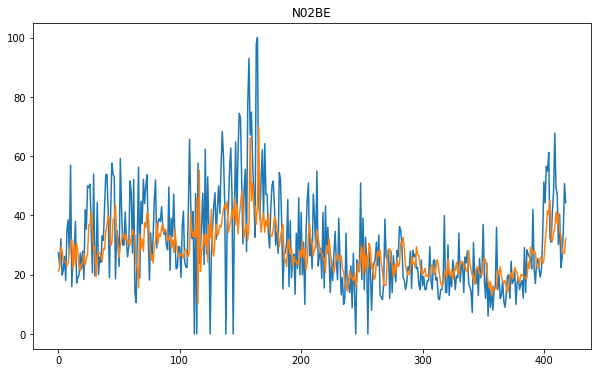

In [21]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test4)
plt.plot(yhat4)
plt.title("N02BE")
plt.show()

## N05B

In [22]:
# define input sequence
raw_seq = dataM_train[['N05B']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model5 = Sequential()
mlp_model5.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model5.add(Dense(1))
mlp_model5.compile(optimizer='adam', loss='mse')
# fit model
mlp_model5.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [23]:
# Test set prediction
x_input =  dataM_test[['N05B']].values.T[0]
X_test, y_test5 = split_sequence(x_input, n_steps)
yhat5 = mlp_model5.predict(X_test, verbose=0)
yhat5=np.where(yhat5 >= 0, yhat5, 0)
print(yhat5[:5])

[[10.924701]
 [ 9.399319]
 [ 7.322252]
 [ 7.612003]
 [ 7.720754]]


In [24]:
# Evaluste Model
RMSE_MLP5 = mean_squared_error(y_test5,yhat5, squared=False)
MAE_MLP5 = mean_absolute_error(y_test5, yhat5)

comp_MLP = np.concatenate((y_test5.reshape((len(y_test5), 1)),yhat5),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP5 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - N05B')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP5, MAE_MLP5, MAPE_MLP5))

MLP - N05B
RMSE: 4.487142746350424 
MAE: 3.5395743365504004 
MAPE: 0.37042872546491445


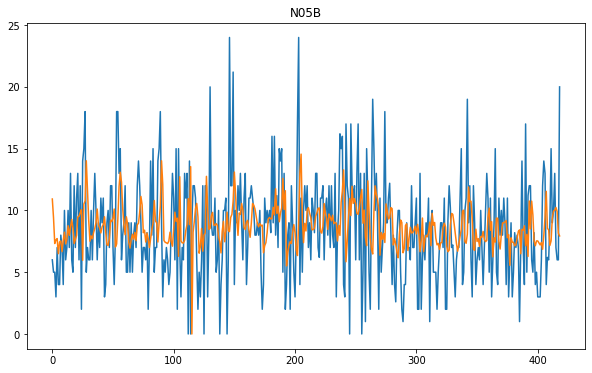

In [25]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test5)
plt.plot(yhat5)
plt.title("N05B")
plt.show()

## N05C

In [26]:
# define input sequence
raw_seq = dataM_train[['N05C']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model6 = Sequential()
mlp_model6.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model6.add(Dense(1))
mlp_model6.compile(optimizer='adam', loss='mse')
# fit model
mlp_model6.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [27]:
# Test set prediction
x_input =  dataM_test[['N05C']].values.T[0]
X_test, y_test6 = split_sequence(x_input, n_steps)
yhat6 = mlp_model6.predict(X_test, verbose=0)
yhat6=np.where(yhat6 >= 0, yhat6, 0)
print(yhat6[:5])

[[0.6033361 ]
 [0.3641445 ]
 [0.41613877]
 [0.39243925]
 [0.65153664]]


In [28]:
# Evaluste Model
RMSE_MLP6 = mean_squared_error(y_test6,yhat6, squared=False)
MAE_MLP6 = mean_absolute_error(y_test6, yhat6)

comp_MLP = np.concatenate((y_test6.reshape((len(y_test6), 1)),yhat6),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP6 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - N05C')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP6, MAE_MLP6, MAPE_MLP6))

MLP - N05C
RMSE: 1.1200530507796016 
MAE: 0.8350615683489597 
MAPE: 0.5870159750985556


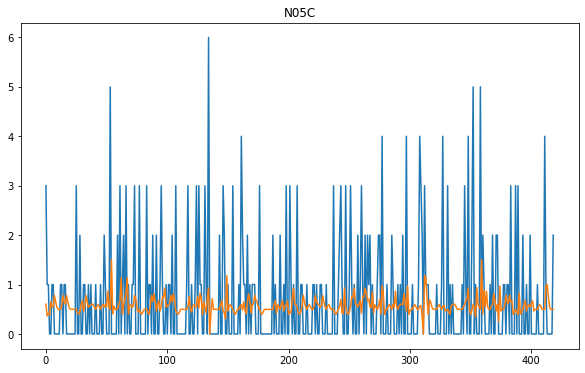

In [29]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test6)
plt.plot(yhat6)
plt.title("N05C")
plt.show()

## R03

In [30]:
# define input sequence
raw_seq = dataM_train[['R03']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model7 = Sequential()
mlp_model7.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model7.add(Dense(1))
mlp_model7.compile(optimizer='adam', loss='mse')
# fit model
mlp_model7.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [31]:
# Test set prediction
x_input =  dataM_test[['R03']].values.T[0]
X_test, y_test7 = split_sequence(x_input, n_steps)
yhat7 = mlp_model7.predict(X_test, verbose=0)
yhat7=np.where(yhat7 >= 0, yhat7, 0)
print(yhat7[:5])

[[4.258841 ]
 [4.2596536]
 [5.2109385]
 [6.065369 ]
 [6.059509 ]]


In [32]:
# Evaluste Model
RMSE_MLP7 = mean_squared_error(y_test7,yhat7, squared=False)
MAE_MLP7 = mean_absolute_error(y_test7, yhat7)

comp_MLP = np.concatenate((y_test7.reshape((len(y_test7), 1)),yhat7),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP7 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - R03')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP7, MAE_MLP7, MAPE_MLP7))

MLP - R03
RMSE: 8.673273164282609 
MAE: 5.904013726414008 
MAPE: 0.4423723537772319


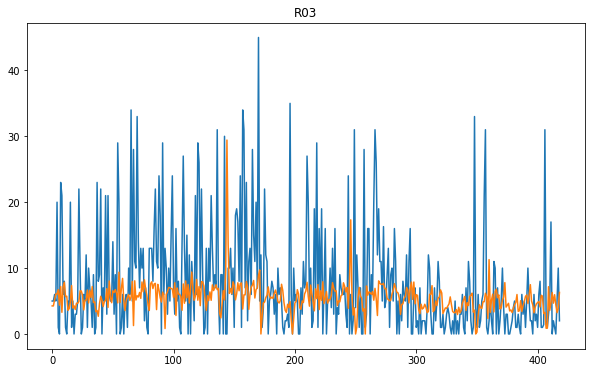

In [33]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test7)
plt.plot(yhat7)
plt.title("R03")
plt.show()

## R06

In [34]:
# define input sequence
raw_seq = dataM_train[['R06']].values.T[0]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# define model
mlp_model8 = Sequential()
mlp_model8.add(Dense(100, activation='relu', input_dim=n_steps))
mlp_model8.add(Dense(1))
mlp_model8.compile(optimizer='adam', loss='mse')
# fit model
mlp_model8.fit(X, y, epochs=1000, batch_size = 50, verbose=0)

In [35]:
# Test set prediction
x_input =  dataM_test[['R06']].values.T[0]
X_test, y_test8 = split_sequence(x_input, n_steps)
yhat8 = mlp_model8.predict(X_test, verbose=0)
yhat8=np.where(yhat8 >= 0, yhat8, 0)
print(yhat8[:5])

[[3.0303862]
 [3.121855 ]
 [2.7467508]
 [2.498871 ]
 [1.819397 ]]


In [36]:
# Evaluste Model
RMSE_MLP8 = mean_squared_error(y_test8,yhat8, squared=False)
MAE_MLP8 = mean_absolute_error(y_test8, yhat8)

comp_MLP = np.concatenate((y_test8.reshape((len(y_test8), 1)),yhat8),axis=1)
comp_MLP = comp_MLP[comp_MLP[:,0] != 0]
MAPE_MLP8 = np.abs(np.mean((comp_MLP[:,1] - comp_MLP[:,0]) / comp_MLP[:,0])) # MAPE for non-null values

print('MLP - R06')
print('RMSE: {} \nMAE: {} \nMAPE: {}'.format(RMSE_MLP8, MAE_MLP8, MAPE_MLP8))

MLP - R06
RMSE: 2.322021366701737 
MAE: 1.7145651616287685 
MAPE: 0.18340863035445257


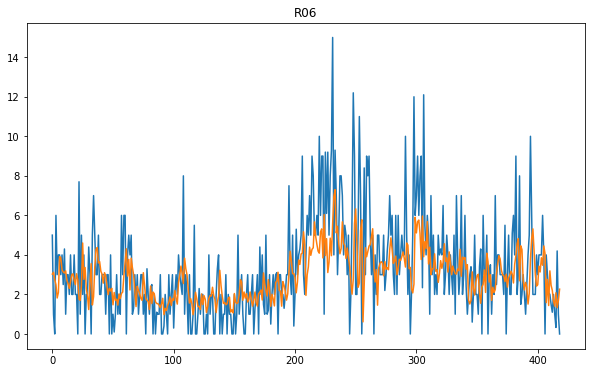

In [37]:
# Forecasting plot
plt.figure(figsize=(10,6))
plt.plot(y_test8)
plt.plot(yhat8)
plt.title("R06")
plt.show()

## Results

In [38]:
results_table = pd.DataFrame([[RMSE_MLP1, MAE_MLP1, '{:,.2%}'.format(MAPE_MLP1)],[RMSE_MLP2, MAE_MLP2, '{:,.2%}'.format(MAPE_MLP2)],[RMSE_MLP3, MAE_MLP3, '{:,.2%}'.format(MAPE_MLP3)],[RMSE_MLP4, MAE_MLP4, '{:,.2%}'.format(MAPE_MLP4)],[RMSE_MLP5, MAE_MLP5, '{:,.2%}'.format(MAPE_MLP5)],[RMSE_MLP6, MAE_MLP6, '{:,.2%}'.format(MAPE_MLP6)],[RMSE_MLP7, MAE_MLP7, '{:,.2%}'.format(MAPE_MLP7)],[RMSE_MLP8, MAE_MLP8, '{:,.2%}'.format(MAPE_MLP8)]], 
                             index=['MLP - M01AB', 'MLP - M01AE','MLP - N02BA','MLP - N02BE','MLP - N05B','MLP - N05C','MLP - R03','MLP - R06'], columns=['RMSE', 'MAE', 'MAPE'])
results_table

,RMSE,MAE,MAPE
MLP - M01AB,2.880211,2.246905,35.38%
MLP - M01AE,2.250206,1.734659,84.94%
MLP - N02BA,2.172983,1.764732,107.55%
MLP - N02BE,13.907003,10.183501,5.57%
MLP - N05B,4.487143,3.539574,37.04%
MLP - N05C,1.120053,0.835062,58.70%
MLP - R03,8.673273,5.904014,44.24%
MLP - R06,2.322021,1.714565,18.34%


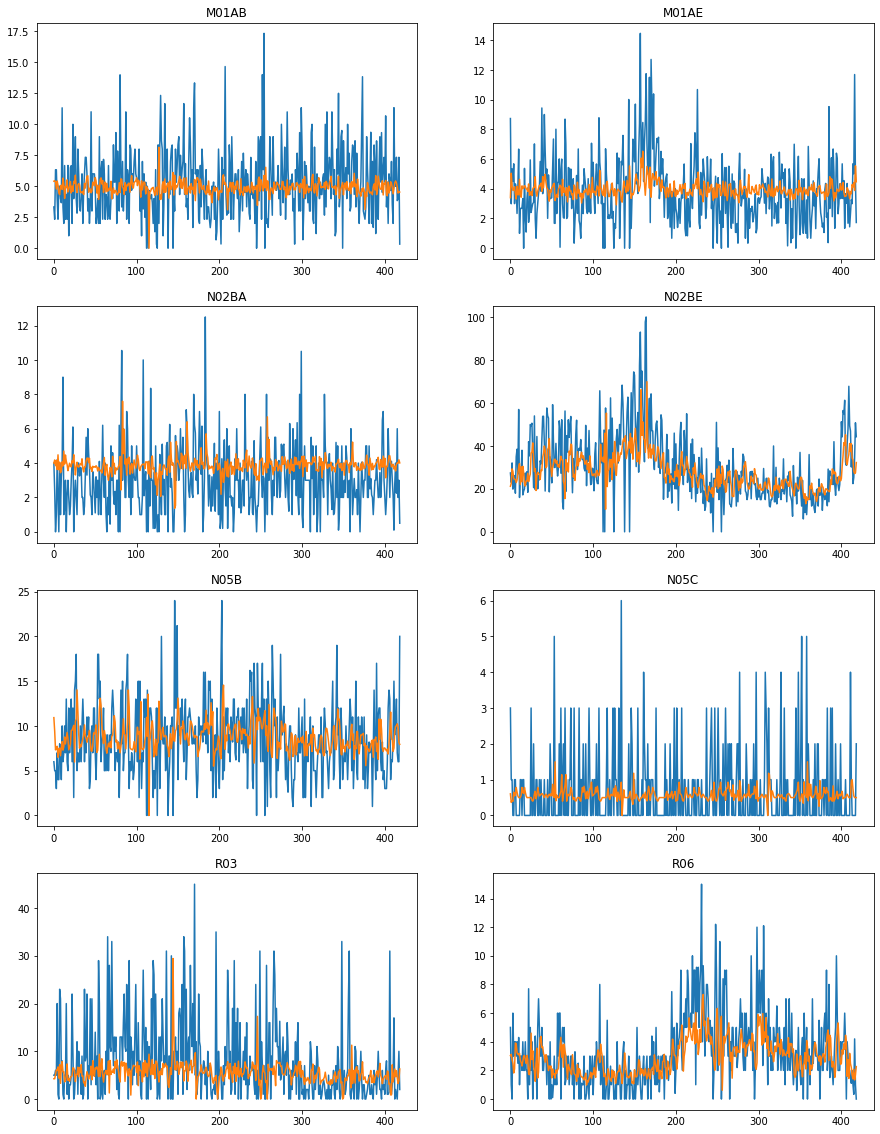

In [63]:
fig, axs = plt.subplots(4, 2,figsize=(15, 20))
axs[0, 0].plot(y_test1)
axs[0, 0].plot(yhat1)
axs[0, 0].set_title('M01AB')
axs[0, 1].plot(y_test2)
axs[0, 1].plot(yhat2)
axs[0, 1].set_title('M01AE')
axs[1, 0].plot(y_test3)
axs[1, 0].plot(yhat3)
axs[1, 0].set_title('N02BA')
axs[1, 1].plot(y_test4)
axs[1, 1].plot(yhat4)
axs[1, 1].set_title('N02BE')
axs[2, 0].plot(y_test5)
axs[2, 0].plot(yhat5)
axs[2, 0].set_title('N05B')
axs[2, 1].plot(y_test6)
axs[2, 1].plot(yhat6)
axs[2, 1].set_title('N05C')
axs[3, 0].plot(y_test7)
axs[3, 0].plot(yhat7)
axs[3, 0].set_title('R03')
axs[3, 1].plot(y_test8)
axs[3, 1].plot(yhat8)
axs[3, 1].set_title('R06')
plt.savefig('mlp_plots.png')